In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-data/superstore_dataset2011-2015.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.float_format', lambda x: '%0.3f' % x)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data= pd.read_csv('/kaggle/input/superstore-data/superstore_dataset2011-2015.csv', encoding = 'ISO-8859-1')

In [6]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium


In [7]:
data.shape

(51290, 24)

In [8]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

**CHECK missing Value**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [10]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

**Check Duplicate Value**

In [11]:
data.duplicated().any()

False

In [12]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000,9994.000,51290.000,51290.000,51290.000,51290.000,51290.000
mean,25645.500,55190.379,246.491,3.477,0.143,28.611,26.376
std,14806.292,32063.693,487.565,2.279,0.212,174.341,57.297
min,1.000,1040.000,0.444,1.000,0.000,-6599.978,0.000
25%,12823.250,23223.000,30.759,2.000,0.000,0.000,2.610
50%,25645.500,56430.500,85.053,3.000,0.000,9.240,7.790
75%,38467.750,90008.000,251.053,5.000,0.200,36.810,24.450
max,51290.000,99301.000,22638.480,14.000,0.850,8399.976,933.570


**DROP unnecessary columns**

In [13]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [14]:
data= data.drop(['Row ID', 'Order ID', 'Customer ID', 'Postal Code'], axis = 1)

In [15]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

**Hypothesis 1:** Technology products have highest profit margin compared to other product categories

In [16]:
cat_data= data.groupby('Category')['Profit'].sum()
cat_data

Category
Furniture         285204.724
Office Supplies   518473.834
Technology        663778.733
Name: Profit, dtype: float64

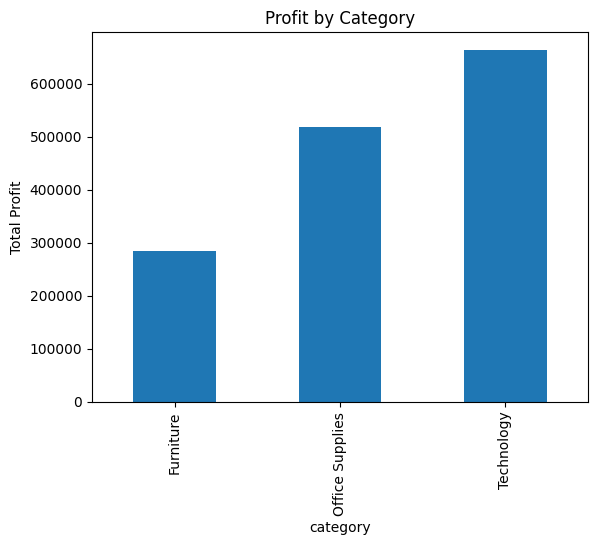

In [17]:
cat_data.plot(kind='bar')
plt.title("Profit by Category")
plt.xlabel("category")
plt.ylabel("Total Profit")
plt.show() 

# Hence the H1 has been proved correct

**Hypothesis 2:** The east region has highest sales as compared to other regions

In [18]:
reg_data = data.groupby('Region')['Sales'].sum()
reg_data

Region
Africa            783773.211
Canada             66928.170
Caribbean         324280.861
Central          2822302.520
Central Asia      752826.567
EMEA              806161.311
East              678781.240
North            1248165.603
North Asia        848309.781
Oceania          1100184.612
South            1600907.041
Southeast Asia    884423.169
West              725457.824
Name: Sales, dtype: float64

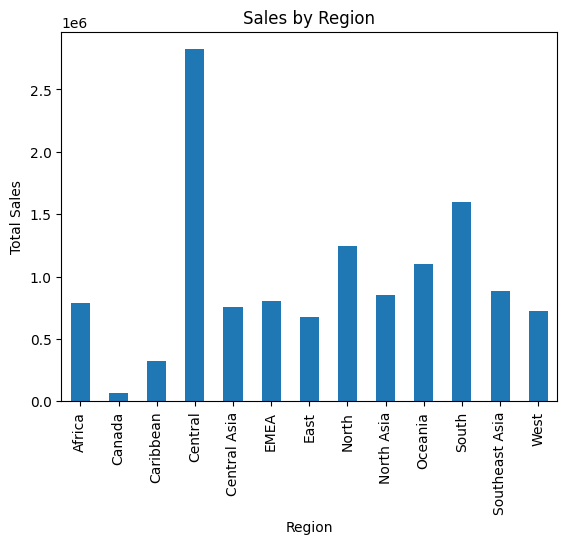

In [19]:
reg_data.plot(kind='bar')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show() 
#H2 is not supported as the central region has the highest sales.

**Hypothesis 3:** Sales are higher during certain months of the year

In [20]:
data['Order Month'] = pd.DatetimeIndex(data['Order Date']).month

month_data = data.groupby('Order Month')['Sales'].sum()

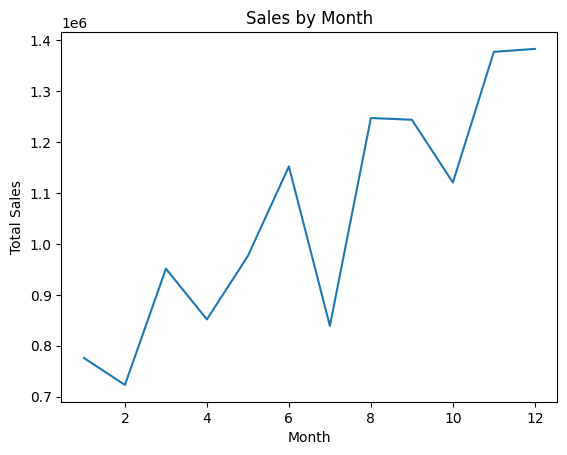

In [21]:
month_data.plot(kind='line')
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show() 

# This supports H3 hypothsis

****Hypothesis 4: ****Same day shipping have the lowest rate of returned products

In [22]:
total_orders_by_shipping_mode =  data.groupby('Ship Mode').size()

returned_orders_by_shipping_mode =  data[data['Profit']<0].groupby('Ship Mode').size()
returned_per_mode = (returned_orders_by_shipping_mode/total_orders_by_shipping_mode ) * 100
returned_per_mode

Ship Mode
First Class      25.077
Same Day         23.917
Second Class     24.076
Standard Class   24.481
dtype: float64

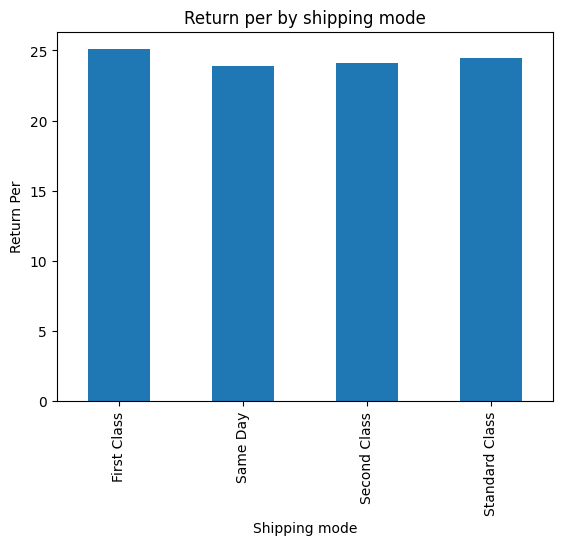

In [23]:
returned_per_mode.plot(kind='bar')
plt.title("Return per by shipping mode")
plt.xlabel("Shipping mode")
plt.ylabel("Return Per")
plt.show() 

# Hypothsis supporting  Same day shipping have the lowest rate of returned products

**Hypothesis 5:** Company profit more on weekdays than on weekends

In [24]:
data['Order Day'] = pd.DatetimeIndex(data['Order Date']).day_name()

In [25]:
Profit_Days = data.groupby('Order Day')['Profit'].sum()
Profit_Days

Order Day
Friday      243802.835
Monday      246526.557
Saturday    176486.552
Sunday      104117.907
Thursday    241183.080
Tuesday     249788.051
Wednesday   205552.309
Name: Profit, dtype: float64

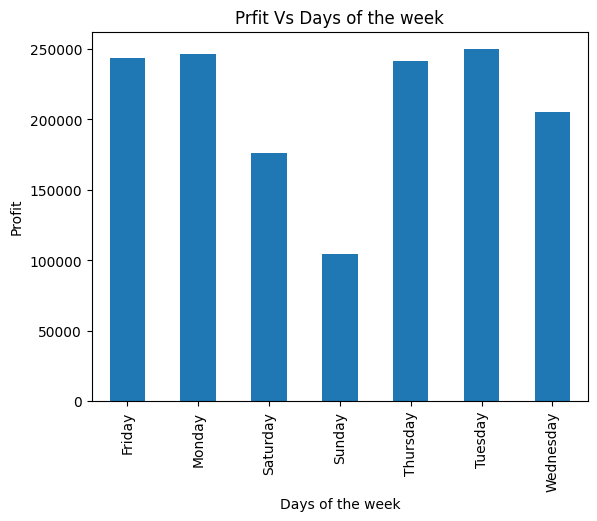

In [26]:
Profit_Days.plot(kind='bar')
plt.title("Prfit Vs Days of the week")
plt.xlabel("Days of the week")
plt.ylabel("Profit")
plt.show()

# Hypothesis is Supported as complete profit is higher on weedays as compared to weekend